# ETL Processing and Time Series Analysis of MRTS Dataset

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

STEP 1: Data Extration + Data Transformation
Used the Pandas function ExcelFile to extract the table consisting of rows and columns determined to be retained in each worksheet of the original MRTS dataset Excel into Pandas DataFrames, and batch output each DataFrames of the corresponding worksheet to a CSV file. The entire process of this step, including the initial normalization of the data in the form of DataFrames, was implemented in one go through the Python CSV extraction script, which served as the basis for the next step of importing the CSV file into a SQL database.

STEP 2: MySQL Engine Creation + MySQL DB Connection Establishing + Data Loading
Created an engine for MySQL by virtue of the create_engine function from the SQLAlchemy library, then used the MySQL Connector library / Python driver to instantiate a connection to the MySQL database via the Python installation script. The script was also tasked with creating a SQL database by running SQL queries from Python, and loading the extracted CSVs into that database.

STEP 3: Data Analysis
Applied several of the most important techniques, including trends, percentage changes, and rolling time windows, to analyze the database's time series. These technologies were implemented by combining SQL queries and a series of related functions in the Pandas library via Python.
    
STEP 4: Data Visualization
Visualized and analyzed the manipulated data of the target businesses with the help of the Matplotlib library to refine the plots and interpret the meaning of the data in the best way.

[Back to top](#Index)


##  Abstract

The Monthly Retail Trade Survey (MRTS) is a data collection program conducted by the Census Bureau in the US. It gathers data from retail businesses to provide information about the retail sector's performance. The MRTS data covers various aspects of retail, including sales, inventories, and more. The first goal of this project is to perform ETL process on the MRTS dataset by using Python and associated powerful data transforming libraries including Pandas and SQLAlchemy. The second goal is to apply several important techniques for time data analysis to analyze the data of target businesses. This process relies heavily on using MySQL queries for retrieval of target data and then using Python tools for fine manipulation and visualization of the retrieved data.

[Back to top](#Index)


## 1. Introduction

This project consists of four steps.

The first step is to use the Pandas function ExcelFile to extract the table consisting of rows and columns determined to be retained in each worksheet of the original MRTS dataset Excel into Pandas DataFrames, and batch output each DataFrames of the corresponding worksheet to a CSV file. The entire process of this step, including the initial normalization of the data in the form of DataFrames, can be implemented in one go through the ***Python CSV extraction script***, which serves as the basis for the next step of importing the CSV file into a SQL database.

The second step is to create an engine for MySQL by virtue of the create_engine function from the SQLAlchemy library to produce an Engine object based on a URL as connect string in format of `mysql+mysqlconnector://<user>:<password>@<host>[:<port>]/<dbname>`. This is followed by instantiating a connection to the MySQL database using the MySQL connector library/Python driver through the ***Python installation script***. The script is also tasked with creating a SQL database by running SQL queries from Python, and loading the extracted CSVs into that database. All transformations of the data from raw to sanitized are done via the *Python CSV extraction script* in Step 1 and the *Python installation script* in Step 2.

The third step is to apply several of the most important techniques, including trends, percentage changes, and rolling time windows, to analyze the database's time series. These technologies are implemented by combining SQL queries and a series of related functions in the Pandas library via Python.

The final step involves visualizing and analyzing the manipulated data of the target businesses with the help of the Matplotlib library to refine the plots and interpret the meaning of the data in the best way.

[Back to top](#Index)

## 2. Extract-Transform-Load

[Back to top](#Index)

### 2.1 The ETL Process

The ETL process, which stands for Extract, Transform, Load, is a crucial step in data integration and preparation for analysis. It involves extracting data from one or more source systems, transforming it into a suitable format or structure, and then loading it into a target data repository, such as a data warehouse or a database. Here's a high-level overview of the ETL process:

Extract: In this phase, data is collected from one or more source systems including databases and files. This project extracts the data from an Excel file separated in worksheets. Only the *Not-Adjusted* data and the columns of Kind of Business and all 12 months are retained in the MRTS. Any extraneous data including data aggregation rows or columns are be considered. In this project, the process is realized by preliminary data cleaning and manipulation in DataFrames read from the source Excel using Pandas ExcelFile.

Transform: Data is transformed into a consistent format suitable for analysis. This project automates the transforming process through a Python script to output CSV files by using *pandas.to_csv*.

Load: The transformed data is loaded into a target data repository. This repository can be a data warehouse, a data lake, a relational database, or other storage systems. This project uses a Python installation script relying on *SQLAlchemy.create_engine* and *mysql.connector* for database connectivity and creates the *mrts* database in the MySQL Server if it does not already exist. It then creates all the tables in the database from the exported CSV files.

In summary, integrated ETL process in Python code for the MRTS dataset involves implementing direct import of data from the raw Excel in Pandas DataFrames, preliminary data cleaning and manipulation in DataFrames before outputting, exporting DataFrames to CSV files, and loading CSV files into a MySQL database as tables.

ETL processing is highly customizable and Python adds the additional benefits of straightforward analysis and display of data through libraries such as Pandas, Matplotlib, and Numpy. It allows for more automations leading to greater efficiency and increased productivity.

The real-time insights that benefit from the integrated process provides convenience during the data transformation process to monitor the results of each operation and provide immediate feedback to facilitate timely decision-making. Any changes or adjustments required during the ETL process could be immediately accounted for in the subsequent analysis stage.

[Back to top](#Index)

### 2.2 Data Exploration
 
The data of Monthly Retail Trade Survey (MRTS) released by *[census.gov](https://www.census.gov/retail/index.html)* is gathered from retail businesses to provide information about the retail sector's performance in the United States.

The raw Excel is separated by one worksheet per year, from 1992 to 2021. In each worksheet it lists the estimated monthly economic activity in the retail sector on a per month basis. The spending data is broken out by industry (sector), idenftied by one or several numeric codes. The data is in millions of dollars. Note that only the sales data for the first 2 months of 2021 are provided, so it is necessary to distinguish its table structure from other years.

If the data do not meet publication standards due to high sampling variability, or if there are other concerns about the quality of the estimates, they are shown as *(S)*, and considered "suppressed". This type of value is supposed to be converted to a *null*. However, according to actual needs, it can be left as is without conversion during the transform process. When analysis involves any including *(S)*, it will be reviewed and handled on a case-by-case basis. For instance, under Section 3.4, a couple of missing data occuring in 2020 under men's clothing stores category are treated by imputation using linear method.

There are two main categories of estimates: *Non-adjusted* and *Adjusted*. *Non-adjusted* is the raw sales data, while *Adjusted* are the estimates presents sales data that has been adjusted for seasonal variations, holidays, or other factors to provide a more accurate picture of monthly sales trends. For the purposes of the analysis of this project, the *Non-adjusted* is to be worked with.

[Back to top](#Index)

### 2.3 Data Preparation

The detailed data preparation process performed in this project is described step by step in the following Python script.

In [1]:
import os
import pandas as pd
import numpy as np

# Create a new directory for storing exported csv files
path = os.getcwd()+'/csv'
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)

# Get all sheet names from the original Excel for csv exporting
xls = pd.ExcelFile('mrtssales92-present.xls')
sheets = xls.sheet_names[1:]

# Import the Excel into DataFrames by sheet name, which involves adding headers, slicing rows and columns for use,
# and including a "Total" column for the adjusted values, which were not originally present 
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for sheet in sheets:
    col_labels = ['Kind of Business']
    for month in months:
        col_labels.append(month+' '+sheet)
    col_labels.append('Total')
    # Specify the columns and rows for use through the specific arguments of the read_excel function
    df_sheet = pd.read_excel('mrtssales92-present.xls', sheet_name=sheet, header=None, names=col_labels,
                          index_col=0, usecols=list(range(1,15)), skiprows=6, nrows=65)
    # Export the organized DataFrame of each sheet to a csv and save it in the pre-specified directory
    df_sheet.to_csv(f'{path}/{sheet}.csv')
    print(f'"{sheet}.csv" saved in folder "csv" successfully!')

# Sales data is only available for the first 2 months of 2021, it's necessary to differentiate its table structure
# Customize and export the sheet for 2021 separately through the following code
col_2021 = ['Kind of Business', 'Jan 2021', 'Feb 2021']
df_2021 = pd.read_excel('mrtssales92-present.xls', sheet_name='2021', header=None, names=col_2021,
                          index_col=0, usecols=list(range(1,4)), skiprows=6, nrows=65)
df_2021['Total'] = df_2021.sum(axis=1)
df_2021.to_csv(f'{path}/2021.csv')
print(f'"2021.csv" saved in folder "csv" successfully!')

"2020.csv" saved in folder "csv" successfully!
"2019.csv" saved in folder "csv" successfully!
"2018.csv" saved in folder "csv" successfully!
"2017.csv" saved in folder "csv" successfully!
"2016.csv" saved in folder "csv" successfully!
"2015.csv" saved in folder "csv" successfully!
"2014.csv" saved in folder "csv" successfully!
"2013.csv" saved in folder "csv" successfully!
"2012.csv" saved in folder "csv" successfully!
"2011.csv" saved in folder "csv" successfully!
"2010.csv" saved in folder "csv" successfully!
"2009.csv" saved in folder "csv" successfully!
"2008.csv" saved in folder "csv" successfully!
"2007.csv" saved in folder "csv" successfully!
"2006.csv" saved in folder "csv" successfully!
"2005.csv" saved in folder "csv" successfully!
"2004.csv" saved in folder "csv" successfully!
"2003.csv" saved in folder "csv" successfully!
"2002.csv" saved in folder "csv" successfully!
"2001.csv" saved in folder "csv" successfully!
"2000.csv" saved in folder "csv" successfully!
"1999.csv" sa

[Back to top](#Index)

### 2.4 Read the Data Using Python

Python offers many methods for reading and handling CSV and Excel files. The Pandas library does the heavy lifting of reading them. By executing simple functions such as *pandas.read_csv*, *pandas.ExcelFile*, and *pandas.ExcelFile.sheet_names* the contents of a properly formed CSV, Excel, or Excel worksheet can be deposited into an easily manipulable DataFrame.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

By using *csv.reader* function provided in the csv Python library, a sample CSV file containing created data can be smoothly read as below.

In [2]:
import csv

sample_path = os.getcwd()+'/sample.csv'
with open(sample_path, 'r') as fi:
    csv_reader = csv.reader(fi, delimiter=',')
    for row in fi:
        print(row)

CollegeID,Name,Students,City,Region,Country

1,MIT,11,Cambridge,MA,USA

2,Brown,9,Providence,RI,USA

3,Dartmouth,6,Hanover,NH,USA

4,Stanford',17,Stanford,CA,USA

5,Yale,12,New Haven,CT,USA


[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

To read the MRTS CSV file using a Python script can be achieved using *pandas.read_csv* provided in the Pandas library alternative to *csv.reader* from the csv library. As explained and completed in Section 2.3, the MRTS CSVs output by year have all been successfully saved in the specified directory, the csv folder. The data from each year can be read and stored in a DataFrame. An example csv (2008.csv) containing data for 2008 is shown below.

In [3]:
path = os.getcwd()+'/csv/2008.csv'

df = pd.read_csv(path)
df

Kind of Business  Jan 2008  Feb 2008  \
0               Retail and food services sales, total    342639    343893   
1   Retail sales and food services excl motor vehi...    276796    274863   
2   Retail sales and food services excl gasoline s...    303949    306277   
3   Retail sales and food services excl motor vehi...    238106    237247   
4                                 Retail sales, total    307576    308171   
..                                                ...       ...       ...   
60                  Food services and drinking places     35063     35722   
61                                    Drinking places      1497      1528   
62                Restaurants and other eating places     30334     30854   
63                           Full service restaurants     15506     15862   
64                      Limited service eating places     14828     14992   

    Mar 2008  Apr 2008  May 2008  Jun 2008  Jul 2008  Aug 2008  Sep 2008  \
0     372907    368920    397956    378507    383726    382862    350542   
1     296293    295184    321829    309079    314049    313186    290053   
2     330681    325257    349444    328422    331998    333794    305360   
3     254067    251521    273317    258994    262321    264118    244871   
4     334416    331002    357277    339791    344158    342443    313308   
..       ...       ...       ...       ...       ...       ...       ...   
60     38491     37918     40679     38716     39568     40419     37234   
61      1709      1655      1742      1696      1883      1839      1675   
62     33274     32299     34833     33284     34081     34746     31019   
63     17102     16289     17706     16704     16957     17422     15356   
64     16172     16010     17127     16580     17124     17324     15663   

    Oct 2008  Nov 2008  Dec 2008    Total  
0     349847    335545    384236  4391580  
1     294821    287679    331883  3605715  
2     309222    305676    357861  3887941  
3     254196    257810    305508  3102076  
4     311422    299238    346513  3935315  
..       ...       ...       ...      ...  
60     38425     36307     37723   456265  
61      1711      1619      1676    20230  
62     32543     31117     32664   391048  
63     15973     15532     16644   197053  
64     16570     15585     16020   193995  

[65 rows x 14 columns]

[Back to top](#Index)

### 2.5 Writing an Installation Script

The detailed installation script writing process implemented in this project is described step by step in the following Python script.

In [4]:
import mysql.connector
import yaml
import os
from sqlalchemy import create_engine
import pandas as pd

doc = yaml.safe_load(open('SQL_Conn_Config.yaml'))
config = {
    'user':doc['user'],
    'passwd':doc['passwd'],
    'host':doc['host'],
    }

# Create an SQLAlchemy engine for MySQL via the assigned driver 'MySQL Connectors'
# url should follow 'mysql+mysqlconnector://<user>:<password>@<host>[:<port>]/<dbname>' format
url = 'mysql+mysqlconnector://{0}:{1}@{2}'.format(
    config['user'],config['passwd'],config['host'])
engine = create_engine(url)

try:
    # Install the driver 'MySQL Connectors'
    cnx = mysql.connector.connect(**config)
    cursor = cnx.cursor()

    # Create the database by executing SQL queries directly on the created engine object 
    cursor.execute('CREATE DATABASE IF NOT EXISTS mrts')
    print('Database "mrts" created successfully!')

    # Get the list of csv files from the directory in a defensive way
    fi_ls = [fi for fi in os.listdir(os.getcwd()+'/csv') if fi.endswith('.csv')]

    # Store the looped csv files in DataFrames and write them as tables into the SQL database via the engine
    for fi in fi_ls:
        df = pd.read_csv(os.path.join(os.getcwd(),'csv',fi))
        # Use to_sql(name,con,schema=None,if_exists='fail',index=True) method to load DataFrames into the database
        # The engine must be assigned to argument 'con'. The loading process does not success without SQLAlchemy
        tbl = fi.replace('.csv','')
        df.to_sql(f'{tbl}', con=engine, schema='mrts', if_exists='replace', index=False)
        print(f'Data from "{fi}" loaded into table "{tbl}" successfully!')

except mysql.connector.Error as err:
    print(f'Error: {err}')

Database "mrts" created successfully!
Data from "1993.csv" loaded into table "1993" successfully!
Data from "1992.csv" loaded into table "1992" successfully!
Data from "1996.csv" loaded into table "1996" successfully!
Data from "1997.csv" loaded into table "1997" successfully!
Data from "1995.csv" loaded into table "1995" successfully!
Data from "1994.csv" loaded into table "1994" successfully!
Data from "2008.csv" loaded into table "2008" successfully!
Data from "2020.csv" loaded into table "2020" successfully!
Data from "2021.csv" loaded into table "2021" successfully!
Data from "2009.csv" loaded into table "2009" successfully!
Data from "2019.csv" loaded into table "2019" successfully!
Data from "2018.csv" loaded into table "2018" successfully!
Data from "2001.csv" loaded into table "2001" successfully!
Data from "2015.csv" loaded into table "2015" successfully!
Data from "2014.csv" loaded into table "2014" successfully!
Data from "2000.csv" loaded into table "2000" successfully!
Da

[Back to top](#Index)

## 3. Analysis and Visualization

The differences, advantages, and disadvantages of running *queries* against a dataset using the MySQL Workbench or a Python environment are summarized below.

Differences:
- MySQL Workbench is a graphical user interface (GUI) tool specifically designed for managing MySQL databases. It provides a point-and-click interface to interact with MySQL databases.
- Queries are typically written in SQL, which is a standard language for managing and querying relational databases.

Advantages:
- User-Friendly: MySQL Workbench is user-friendly and can be a great choice for users who prefer a visual interface for managing databases.
- Database Management: In addition to running queries, MySQL Workbench offers tools for database administration, schema design, and more.

Disadvantages:
- Limited Scripting: While MySQL Workbench supports SQL scripting, it may not be the best choice for advanced data manipulation or analysis that requires scripting capabilities.
- Less Automation: It's less suitable for automating data extraction and manipulation processes.
- Limited Integration: It's primarily designed for MySQL databases and may not be as versatile when working with other data sources.
- Visual Data Exploration: The built-in data modeling and visualization tools pale in comparison to the powerful functions of Python’s data visual display libraries such as Matplotlib and Seaborn.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Sample *queries* are run against the MRTS dataset in MySQL Workbench to verify that everything works as expected.

Query 1:
```python
SELECT * FROM mrts.`2008` WHERE Total >= 1500000 ORDER BY `Total` DESC;
```
Query 2:
```python
SELECT COUNT(*) Count FROM mrts.`2008`;
```
The tables returned as below after executing the above statements show that they are working.

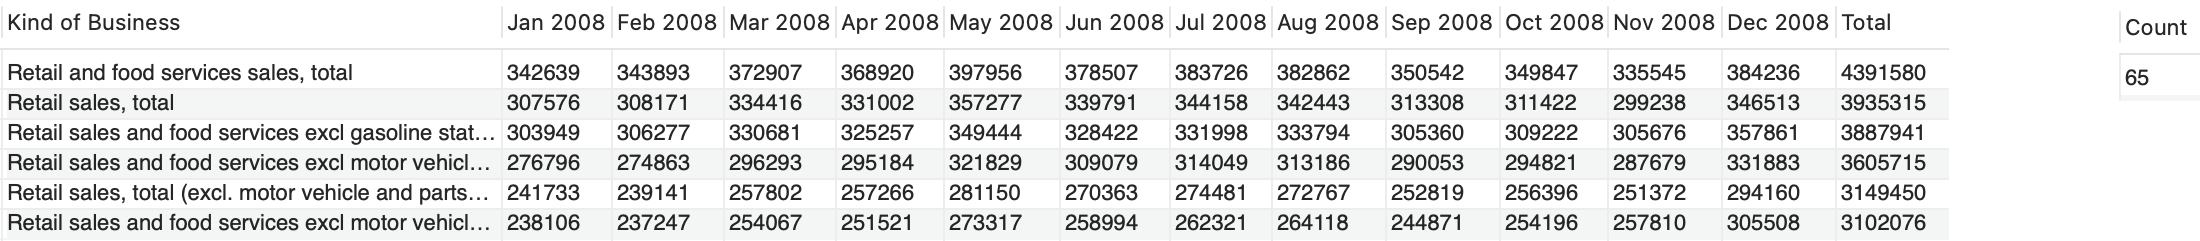

[Back to top](#Index)

### 3.2 Running Queries From Python

The process of running the previous queries on the MRTS dataset by using a Python script is shown step by step in the following Python script. The print results are the same as in MySQL Workbench, verifying that everything works as expected.

In [5]:
import mysql.connector
import yaml
import pandas as pd

# The connection string provides info about a data server and how the connection to it is made
doc = yaml.safe_load(open('SQL_Conn_Config.yaml'))
config = {
    'user':doc['user'],
    'passwd':doc['passwd'],
    'host':doc['host'],
    'db':doc['db']}

# The cursor class allows Python code to execute SQL commands in a database session
cnx = mysql.connector.connect(**config)

# Assign cursor function to a handle to issue queries
cursor = cnx.cursor()

# Execute SQL query 1 run in Section 3.1 using the execute method of the cursor class in mysql.connector library
cursor.execute('SELECT * FROM mrts.`2008` WHERE Total >= 1500000 ORDER BY `Total` DESC')
for row in cursor.fetchall():
    print(row)

# Execute SQL query 2 run in Section 3.1 using the execute method of the cursor class in mysql.connector library
cursor.execute('SELECT COUNT(*) Count FROM mrts.`2008`')
print(cursor.fetchone())

('Retail and food services sales, total', 342639, 343893, 372907, 368920, 397956, 378507, 383726, 382862, 350542, 349847, 335545, 384236, 4391580)
('Retail sales, total', 307576, 308171, 334416, 331002, 357277, 339791, 344158, 342443, 313308, 311422, 299238, 346513, 3935315)
('Retail sales and food services excl gasoline stations', 303949, 306277, 330681, 325257, 349444, 328422, 331998, 333794, 305360, 309222, 305676, 357861, 3887941)
('Retail sales and food services excl motor vehicle and parts', 276796, 274863, 296293, 295184, 321829, 309079, 314049, 313186, 290053, 294821, 287679, 331883, 3605715)
('Retail sales, total (excl. motor vehicle and parts dealers)', 241733, 239141, 257802, 257266, 281150, 270363, 274481, 272767, 252819, 256396, 251372, 294160, 3149450)
('Retail sales and food services excl motor vehicle and parts and gasoline stations', 238106, 237247, 254067, 251521, 273317, 258994, 262321, 264118, 244871, 254196, 257810, 305508, 3102076)
(65,)


[Back to top](#Index)

### 3.3 Explore Trends

An economic trend refers to the general direction in which a particular economic variable or set of variables is moving over time. Economic trends can encompass a wide range of factors, including economic indicators like GDP, inflation rates, unemployment rates, consumer spending, and more. These trends are used to analyze and understand the overall health and performance of an economy. Consumer spending patterns are often influenced by broader economic trends. In a robust economy with low unemployment, consumers may be more confident and willing to spend, while during economic downturns, consumers may cut back on spending.

Trend exploration SQL queries
- The query to explore the trend of the retail and food services sales category in the data is below. By running this query in a loop in Python, the retail and food services rows from all tables in mrts database are collected into a list and then concatenated into a single table for effective analysis and data visualization.
```python
SELECT * FROM mrts.`{i}` WHERE `Kind of Business` = "Retail and food services sales, total"
```

- The following query is used to explore differences in trends among the target 3 categories: bookstores, sporting goods stores, hobby, toy and game stores. By running this query in a loop in Python, the subtables including the 3 categories in rows and time series in columns from all tables in mrts database are collected into a list and then concatenated into a single table for effective analysis and data visualization.
```python
SELECT * FROM mrts.`{i}`
WHERE `Kind of Business` IN ("Book stores", "Sporting goods stores", "Hobby, toy, and game stores")
```

Analysis of the trend of the retail and food services categories
- Since there is no missing data provided for the retail and food services category, it exhibits good continuity and completeness over the time series, which helps in perceiving the trend. Although in the long term, an uptrend with a strong seasonal pattern is evident enough, since the graph is a bit noisy, to see a clearer trend I chose July sales as a more reasonable coarseness since the average sales in a typical year are closest to July sales. The long-term trend visualized from the coarsened data is more pronounced, with a mid-term decline from 2008 to 2009, which corresponds to the Great Recession that occurred from late 2007 to 2009.

Comprehensive trend analysis and comparison of the performance of the three chosen businesses of bookstores, sporting goods stores, hobby, toy and game stores
- When choosing the businesses of bookstores, sporting goods stores, and hobby, toy and game stores for comparison, the sporting goods business was the highest trend and grew fastest among all of these choices, followed by the hobby, toy and game business. However, regardless of seasonal fluctuations, the long-term trend of the hobby, toy and game business remained stationary. In contrast, the bookstore business has shown a clear long-term downtrend since 2008.

- All 3 businesses presented their respective seasonal patterns. The seasonal pattern of the sporting goods business is basically consistent with that of the hobby, toy and game business, with the peak season occurring in early December and the slack season occurring in early January. The bookstore business had two sales peaks in August and early December but no obious slack season. As for the bookstore business, there were two sales peaks in August and December but no obvious off season.

- Sales in all three businesses unexceptionally experienced sudden declines in April 2020 that were inconsistent with their seasonal patterns. After that drop, the sporting goods business not only rebounded quickly within two months but also hit a new sales high and continued the trend of year-over-year (YOY) growth. The other two businesses still maintained their respective long-term stationary trend and downtrends after recovering from the trough.

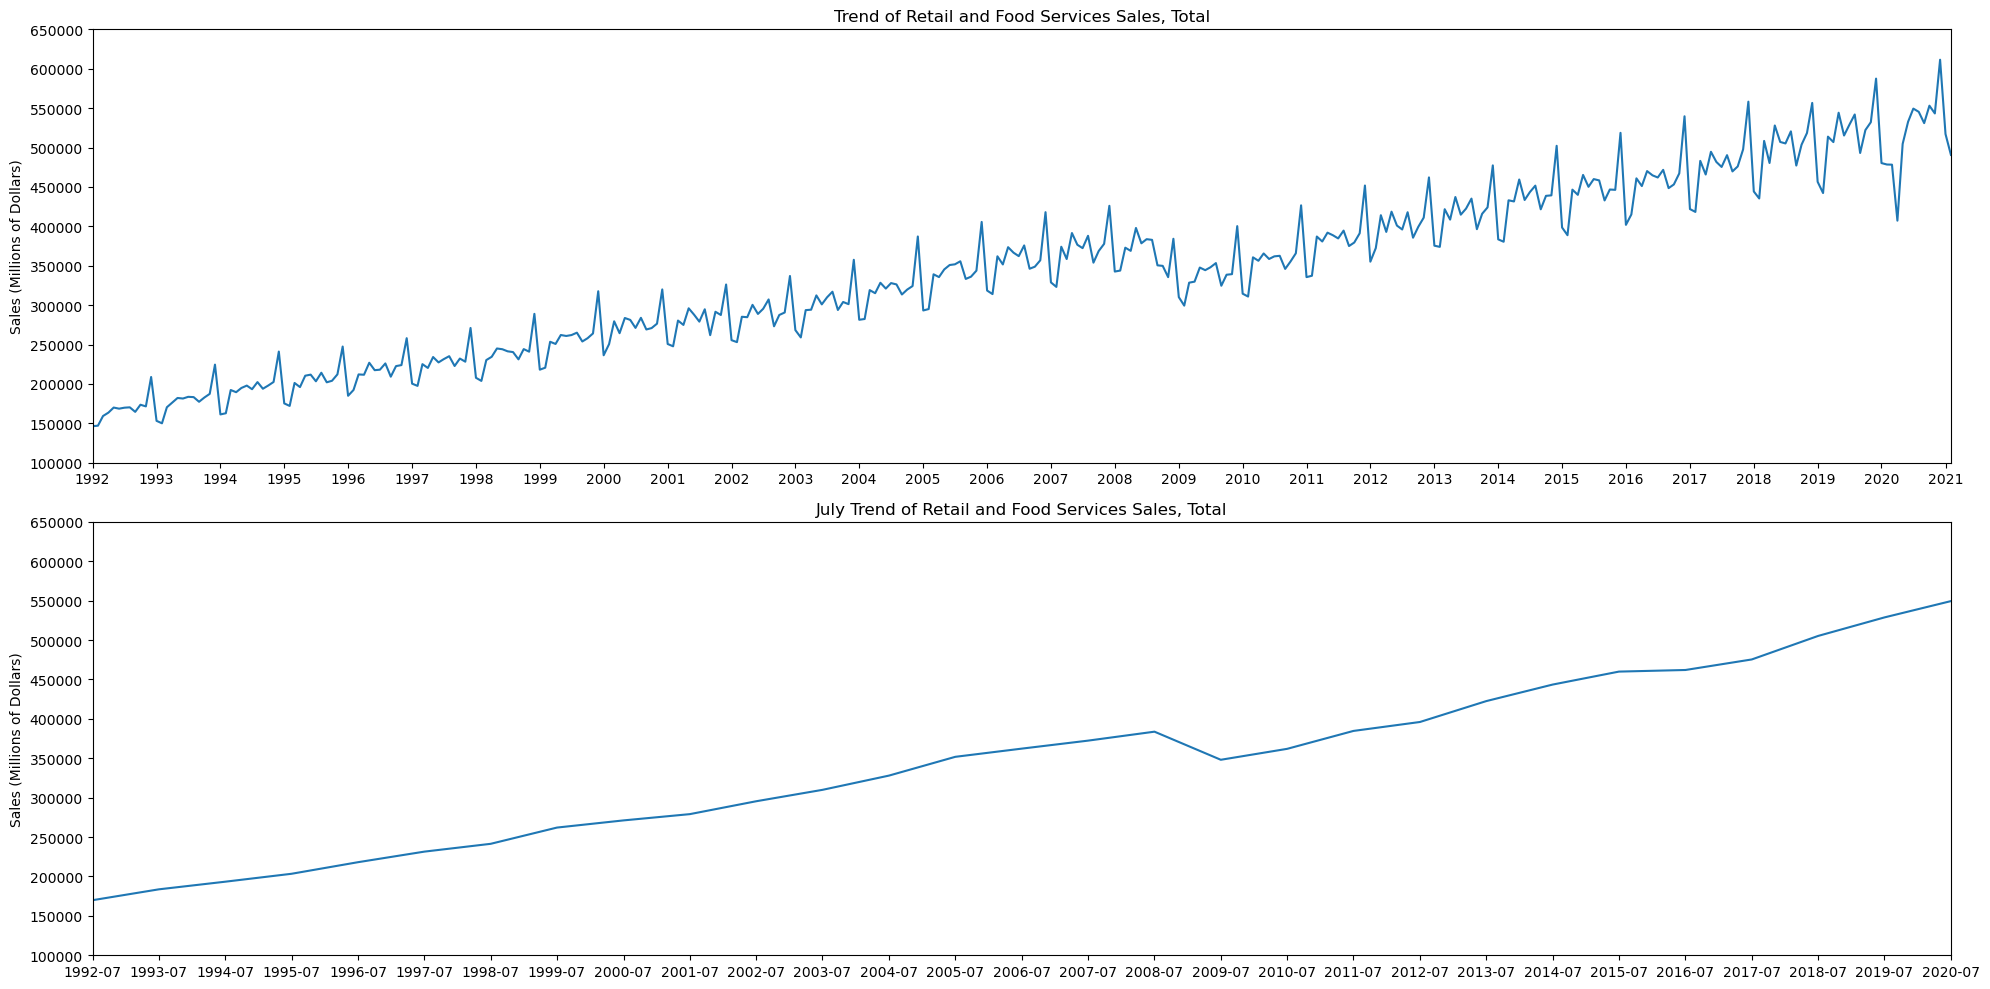

In [6]:
# Collect the row of retail and food services from all tables in mrts database into a list by looping an SQL query
rfs_ls = []
for i in range(1992,2022):
    rfs_sql = f'SELECT * FROM mrts.`{i}` WHERE `Kind of Business` = "Retail and food services sales, total"'
    rfs_tbl = pd.read_sql(rfs_sql, con=engine).set_index('Kind of Business').drop(columns='Total').astype(np.int64)
    rfs_ls.append(rfs_tbl)

# Merge the table list into a single DataFrame using Pandas concat function
rfs = pd.concat(rfs_ls, axis=1)

# Parse column labels to standard datetime format
rfs.columns = pd.to_datetime(rfs.columns, format='%b %Y')

# Plot the trend of the retail and food services category across the entire recorded time range in the database
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
fig, ax = plt.subplots(2,1)
ax[0].plot(rfs.columns, rfs.loc['Retail and food services sales, total'].values)

# Set the range and frequency of the X-axis with datetimes
ax[0].xaxis.set_major_locator(mdates.YearLocator(base=1))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[0].set_xlim([datetime.date(1992,1,1), datetime.date(2021,2,1)])
ax[0].set_ylim([100000,650000])
ax[0].set_yticks(np.arange(100000,700000,50000)) 
ax[0].set_ylabel('Sales (Millions of Dollars)')
ax[0].set_title('Trend of Retail and Food Services Sales, Total')

# Create a view of the table that focuses on a range of time series around 2020 for more detailed analysis 
ls_July = [f'{i}-07-01' for i in range(1992,2021)]
rfs_view = rfs[ls_July]
ax[1].plot(rfs_view.columns, rfs_view.loc['Retail and food services sales, total'].values)

# Set the range and frequency of the X-axis with datetimes for the view
ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=7))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].set_xlim([datetime.date(1992,7,1), datetime.date(2020,7,1)])
ax[1].set_ylim([100000,650000])
ax[1].set_yticks(np.arange(100000,700000,50000)) 
ax[1].set_ylabel('Sales (Millions of Dollars)')
ax[1].set_title('July Trend of Retail and Food Services Sales, Total')

fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
plt.show()

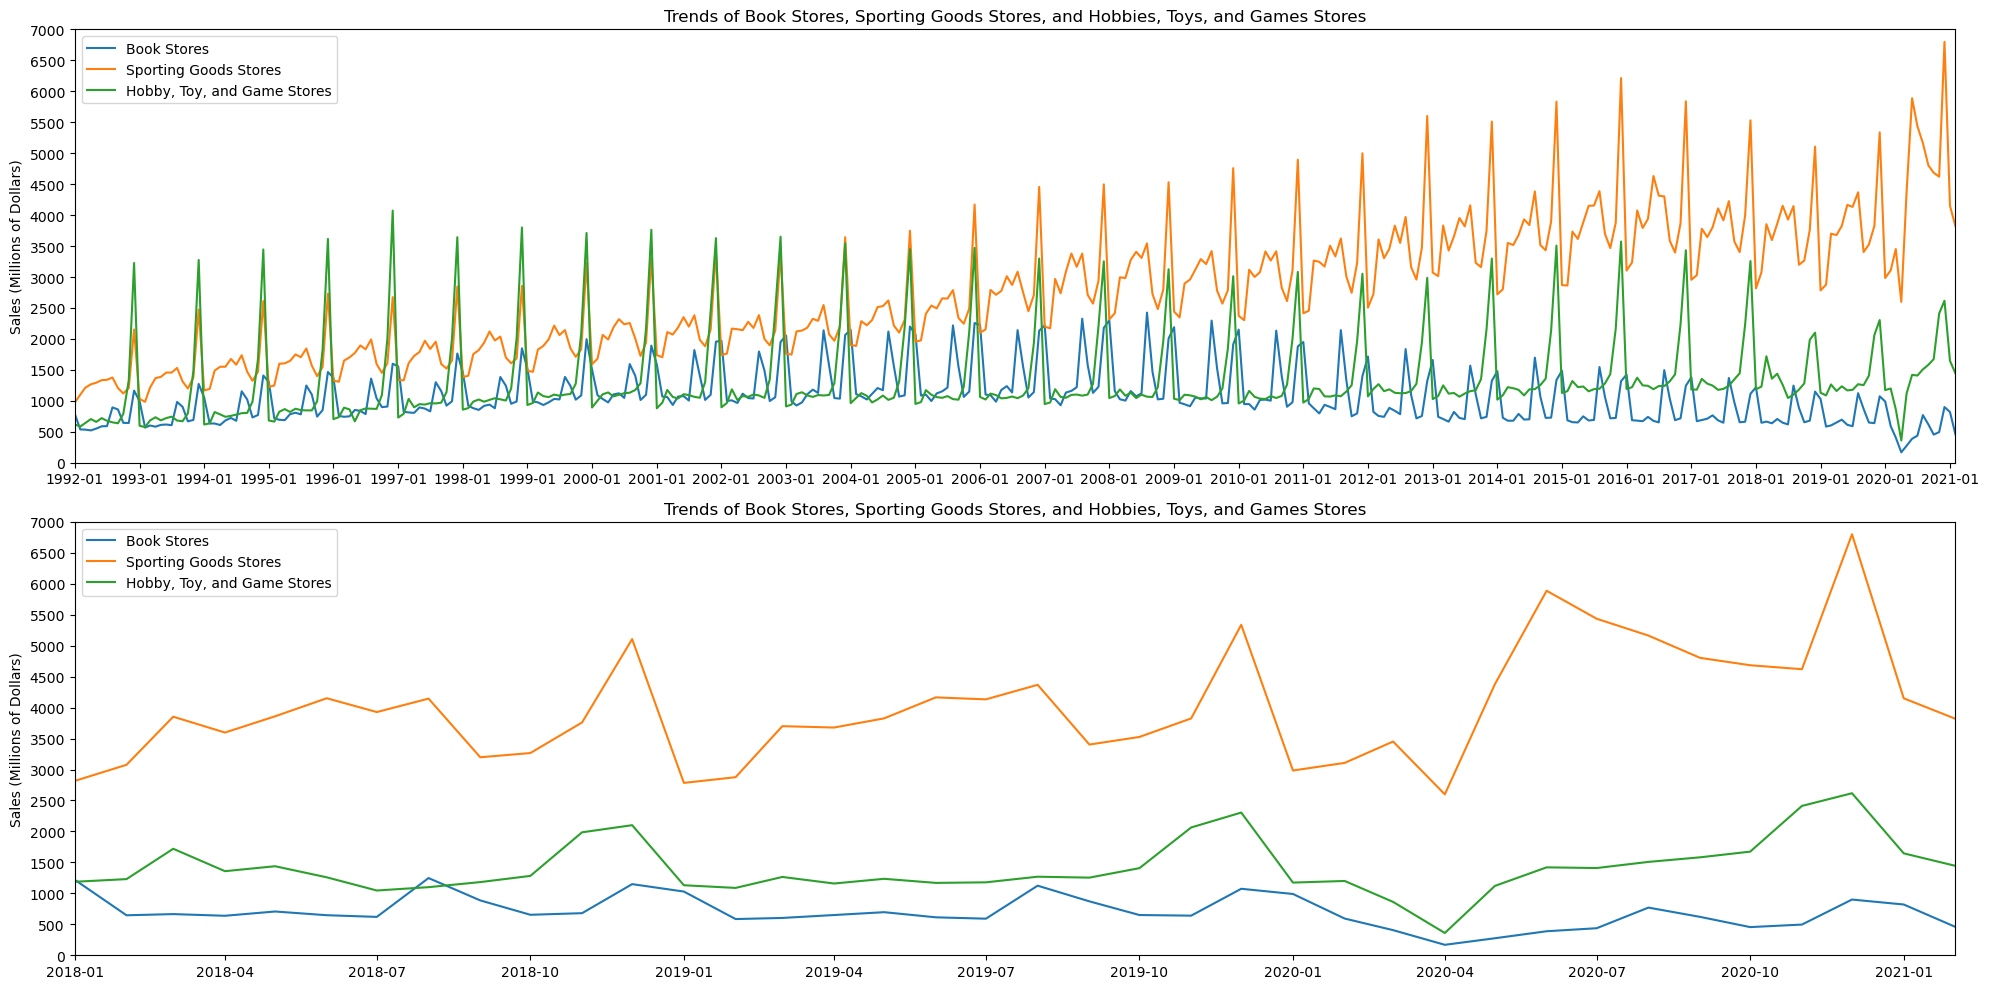

In [7]:
# Collect rows of book stores, sporting goods stores, and hobbies, toys, and games stores from all tables in the db
bsh_ls = []
for i in range(1992,2022):
    bsh_sql = f'SELECT * FROM mrts.`{i}` \
    WHERE `Kind of Business` IN ("Book stores", "Sporting goods stores", "Hobby, toy, and game stores")'
    bsh_tbl = pd.read_sql(bsh_sql, con=engine).set_index('Kind of Business').drop(columns='Total').astype(np.int64)
    bsh_ls.append(bsh_tbl)

# Merge the table list into a single DataFrame using Pandas concat function
bsh = pd.concat(bsh_ls, axis=1)

# Parse column labels to standard datetime format
bsh.columns = pd.to_datetime(bsh.columns, format='%b %Y')

# Plot the trend of the 3 target businesses across the entire time range provided in the database
fig, ax = plt.subplots(2,1)
ax[0].plot(bsh.columns, bsh.loc['Book stores'].values, label='Book Stores')
ax[0].plot(bsh.columns, bsh.loc['Sporting goods stores'].values, label='Sporting Goods Stores')
ax[0].plot(bsh.columns, bsh.loc['Hobby, toy, and game stores'].values, label='Hobby, Toy, and Game Stores')

# Set the range and frequency of the X-axis with datetimes
ax[0].xaxis.set_major_locator(mdates.YearLocator(base=1))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[0].set_xlim([datetime.date(1992,1,1), datetime.date(2021,2,1)])
ax[0].set_ylim([0,7000])
ax[0].set_yticks(np.arange(0,7500,500))
ax[0].set_ylabel('Sales (Millions of Dollars)')
ax[0].set_title('Trends of Book Stores, Sporting Goods Stores, and Hobbies, Toys, and Games Stores')
ax[0].legend()

# Create a view of the table that focuses on a range of time series around 2020 for more detailed analysis 
bsh_view = bsh.drop(bsh.loc[:,:'2017-12-01'].columns, axis=1)
ax[1].plot(bsh_view.columns,bsh_view.loc['Book stores'].values,label='Book Stores')
ax[1].plot(bsh_view.columns,bsh_view.loc['Sporting goods stores'].values,label='Sporting Goods Stores')
ax[1].plot(bsh_view.columns,bsh_view.loc['Hobby, toy, and game stores'].values,label='Hobby, Toy, and Game Stores')

# Set the range and frequency of the X-axis with datetimes for the view
ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,3)))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].set_xlim([datetime.date(2018,1,1), datetime.date(2021,2,1)])
ax[1].set_ylim([0,7000])
ax[1].set_yticks(np.arange(0,7500,500))
ax[1].set_ylabel('Sales (Millions of Dollars)')
ax[1].set_title('Trends of Book Stores, Sporting Goods Stores, and Hobbies, Toys, and Games Stores')
ax[1].legend()

fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
plt.show()

[Back to top](#Index)

### 3.4 Explore Percentage Change

Percentage change is used to calculate by what percentage a variable has changed over a time period. One example is the percentage change in end of day closing prices of stocks. Percentage change is a crucial measure in economics and various other fields because it helps to quantify and express how much a particular variable or quantity has changed in relative terms, rather than absolute terms. It is calculated by the formula below, where $C =$ relative change, $x_{1} =$ previous value, and $x_{2} =$ current value.
$$ C(\%) = \frac{(x_{2}-x_{1})}{x_{1}} * 100 $$

Percentage change exploration SQL queries
- The query to explore the percentage change of men's and women's clothing businesses in the data is below. By running this query in a loop in Python, the subtables containing these 2 categories in rows and time series in columns from all tables in mrts database are collected into a list and then concatenated into a single table for effective analysis and data visualization.
```python
SELECT * FROM mrts.`{i}` WHERE `Kind of Business` IN ("Men\'s clothing stores", "Women\'s clothing stores")
```
By Plotting the percentage changes from yearly coarsened data chosen from September, which was the month closest to annual average sales, it is noticeable that the percentage change directions for both businesses are correlated most of the time throughout the time frame, except that during the periods 1993-1999 and 2016-2019, the opposite directions of the percentage changes in the two can be captured.

As far as these two businesses are concerned, the women's clothing business contributed an average of 80% of the overall clothing market, fluctuating between 75% and 85%, while the men's clothing business only accountsed for about 20% of the overall market. Looking at the time series, the women's clothing business experienced a slight downtrend from 1992 to 1998, with the quota falling to 75%, followed by a long-term rise until it reached 85% in 2010. In the 10 years since 2010, it slowly dropped back to 80%. In 2020, its sales proportion jumped significantly to 85%. Percent change trend in men's clothing business can be easily deduced from women's clothing changes over time.

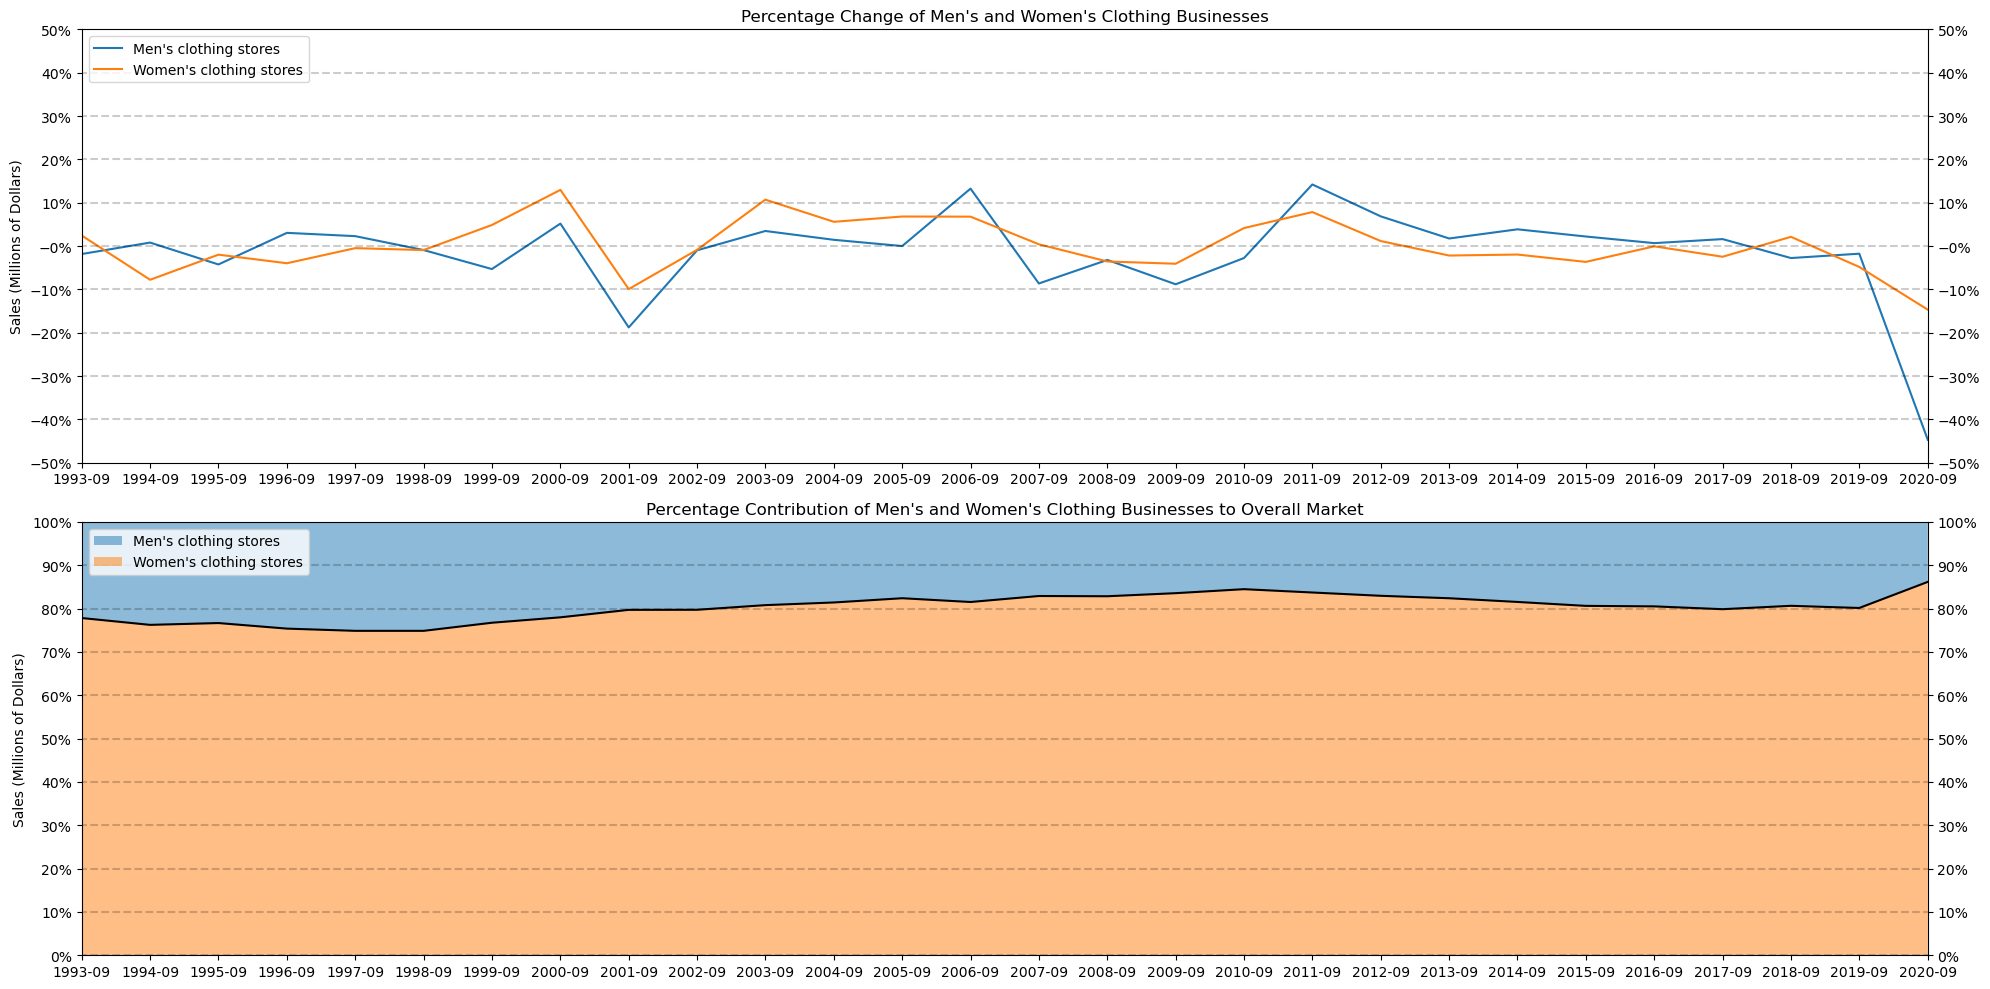

In [8]:
# Collect rows of men's clothing stores and women's clothing stores from all tables in mrts database
mwc_ls = []
for i in range(1992,2022):
    mwc_sql = f'SELECT * FROM mrts.`{i}` \
    WHERE `Kind of Business` IN ("Men\'s clothing stores", "Women\'s clothing stores")'
    mwc_tbl = pd.read_sql(mwc_sql, con=engine).set_index('Kind of Business').drop(columns='Total')
    mwc_ls.append(mwc_tbl)

# Merge the table list into a single DataFrame using Pandas concat function
mwc = pd.concat(mwc_ls, axis=1)

# Parse column labels to standard datetime format
mwc.columns = pd.to_datetime(mwc.columns, format='%b %Y')

# Impute missing data occuring in 2020 under men's clothing stores category using linear method
mwc.iloc[0,-5:-3] = np.linspace(eval(mwc.iloc[0]['2020-09-01']), eval(mwc.iloc[0]['2020-12-01']), 4)[1:3]
mwc = mwc.astype(np.int64)

# Get % change using pct_change from yearly coarsened data chosen from the month closest to annual average sales 
ls_Sep = [f'{i}-09-01' for i in range(1992,2021)]
mwc_pct = mwc[ls_Sep].pct_change(axis=1)

# Plot % change of men's and women's clothing businesses across the entire time range
fig, ax = plt.subplots(2,1)
ax[0].plot(mwc_pct.columns, mwc_pct.loc['Men\'s clothing stores'].values, label='Men\'s clothing stores')
ax[0].plot(mwc_pct.columns, mwc_pct.loc['Women\'s clothing stores'].values, label='Women\'s clothing stores')
for i in np.arange(-0.4,0.5,0.1):
    ax[0].plot(mwc_pct.columns, np.full((29),i), '--', c=(0,0,0,0.2))

# Set the range and frequency of the X-axis with datetimes; Format numbers as a percentage on the Y-axis
from matplotlib import ticker
ax[0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=9))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,symbol='%'))
ax[0].set_xlim([datetime.date(1993,9,1), datetime.date(2020,9,1)])
ax[0].set_ylim([-0.5,0.5])
ax[0].set_yticks(np.arange(-0.5,0.6,0.1))
ax[0].yaxis.set_ticks_position('both')
ax[0].tick_params(labelleft=True, labelright=True)
ax[0].set_ylabel('Sales (Millions of Dollars)')
ax[0].set_title('Percentage Change of Men\'s and Women\'s Clothing Businesses')
ax[0].legend(loc=2)

# Get the % contribution of each business to the overall clothing market
mwc_view = mwc[ls_Sep]
mwc_men = mwc_view.loc['Men\'s clothing stores'] / mwc_view.sum()
mwc_women = mwc_view.loc['Women\'s clothing stores'] / mwc_view.sum()

# Plot the % contribution of men's and women's clothing businesses across the entire time range
ax[1].plot(mwc_view.columns, mwc_men, label='Men\'s clothing stores', ls='')
ax[1].plot(mwc_view.columns, mwc_women, label='Women\'s clothing stores', c='black')
for i in np.arange(0,1.1,0.1):
    ax[1].plot(mwc_view.columns, np.full((29),i), '--', c=(0,0,0,0.2))

# Set the range and frequency of the X-axis with datetimes; Format numbers as a percentage on the Y-axis
ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=9))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,symbol='%'))
ax[1].set_xlim([datetime.date(1993,9,1), datetime.date(2020,9,1)])
ax[1].set_ylim([0,1])
ax[1].set_yticks(np.arange(0,1.1,0.1))
ax[1].yaxis.set_ticks_position('both')
ax[1].tick_params(labelleft=True, labelright=True)
fill_men = ax[1].fill_between(mwc_view.columns, mwc_women, 1, alpha=0.5)
fill_women = ax[1].fill_between(mwc_view.columns, mwc_women, 0, alpha=0.5)
ax[1].set_ylabel('Sales (Millions of Dollars)')
ax[1].set_title('Percentage Contribution of Men\'s and Women\'s Clothing Businesses to Overall Market')
ax[1].legend(loc=2, handles=[fill_men,fill_women], labels=['Men\'s clothing stores','Women\'s clothing stores'])

fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
plt.show()

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

A rolling time window, in economics and data analysis, is a method used to analyze data over a specific time period that continuously updates as time progresses. It involves repeatedly computing statistics or performing analysis on a fixed-size time interval of data, then moving the window forward by a certain time increment (e.g., days, weeks, months) and performing the same analysis again. This rolling or moving window approach allows for a dynamic assessment of data trends and patterns over time.

Rolling time window exploration SQL queries
- The following query is used to graphs of rolling time windows for 2 target businesses: automobile dealers and gasoline stations. By running this query in a loop in Python, the subtables including both businesses in rows and time series in columns from all tables in mrts database are collected into a list and then concatenated into a single table for effective analysis and data visualization.
```python
SELECT * FROM mrts.`{i}` WHERE `Kind of Business` IN ("Automobile dealers", "Gasoline stations")
```
By analyzing data over a rolling window, the noise and fluctuations in the data can be reduced. This helps in identifying underlying trends and patterns while mitigating the impact of short-term, random variations. The rolling average sales of the 2 businesses was basically consistent in the overall trend direction before 2012. After that, the sales of gasoline stations began a downtrend in a wavy pattern, while the sales of the automobile dealers maintained a strong rise. The Great Recession in 2008-2010 were fairly reflected in the steep sales slides for both businesses during the corresponding period.

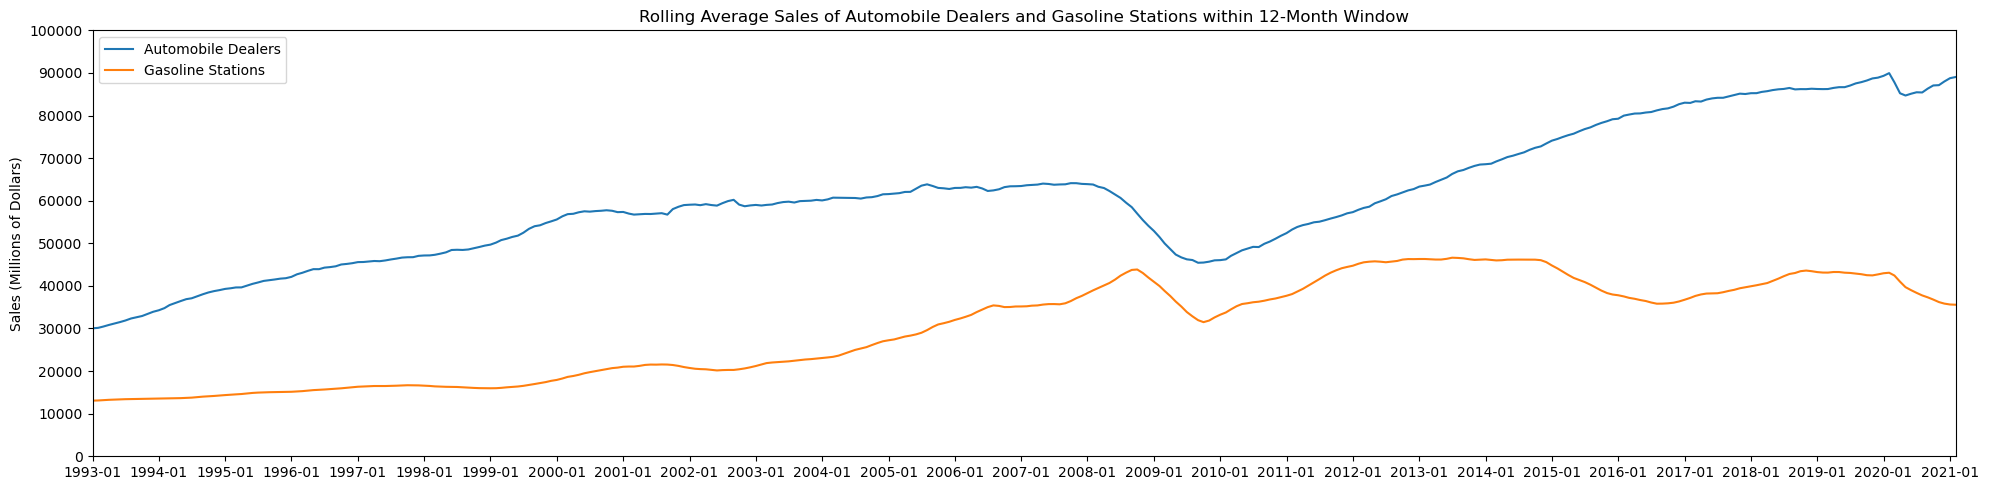

In [10]:
# Collect rows of automobile dealers and gasoline stations from all tables in mrts database
car_ls = []
for i in range(1992,2022):
    car_sql = f'SELECT * FROM mrts.`{i}` WHERE `Kind of Business` IN ("Automobile dealers", "Gasoline stations")'
    car_tbl = pd.read_sql(car_sql, con=engine).set_index('Kind of Business').drop(columns='Total')
    car_ls.append(car_tbl)
    
# Merge the table list into a single DataFrame using Pandas concat function
car = pd.concat(car_ls, axis=1).astype(np.int64)

# Parse column labels to standard datetime format
car.columns = pd.to_datetime(car.columns, format='%b %Y')
 
# Define the rolling window size, for a 12-month rolling window, using Pandas rolling function
car_roll = car.rolling(window=12, axis=1).mean()

# Plot the rolling average sales for each business within 12-month rolling window across the entire time range
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(car_roll.columns, car_roll.loc['Automobile dealers'].values, label='Automobile Dealers')
plt.plot(car_roll.columns, car_roll.loc['Gasoline stations'].values, label='Gasoline Stations')

# Set the range and frequency of the X-axis with datetimes
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlim([datetime.date(1993,1,1), datetime.date(2021,2,1)])
plt.ylim([0,100000])
plt.yticks(np.arange(0,110000,10000))
plt.ylabel('Sales (Millions of Dollars)')
plt.title('Rolling Average Sales of Automobile Dealers and Gasoline Stations within 12-Month Window')
plt.legend()
plt.tight_layout()
plt.show()

[Back to top](#Index)

## Conclusion

By applying several of the most important techniques including trends, percentage changes, and rolling time windows to analyze time series against the mrts database, and with the help of data visualization, the following conclusions are drawn.

Among all the businesses studied above, retail and food services, sporting goods stores and car dealers have all increased in sales by about two times in the time series, and are therefore considered likely to attract the most spending, while bookstores, as a traditional business, have sustained a downtrend in time series since 2008. They are expected to attract the least spending in the future.

[Back to top](#Index)

## References

- "pandas.ExcelFile." 2023 pandas via NumFOCUS, Inc. Hosted by OVHcloud. https://pandas.pydata.org/docs/reference/api/pandas.ExcelFile.html#pandas.ExcelFile .

- Prabhakaran, Selva. "Time Series Analysis in Python – A Comprehensive Guide with Examples." machinelearningplus. https://www.machinelearningplus.com/time-series/time-series-analysis-python/ .

- "Working with Engines and Connections." SQLAlchemy. https://docs.sqlalchemy.org/en/20/core/connections.html .